Helper video for reference - https://www.youtube.com/watch?v=fH5h2erB0xY&ab_channel=ManifoldAILearning

## Create NN with Tensorflow

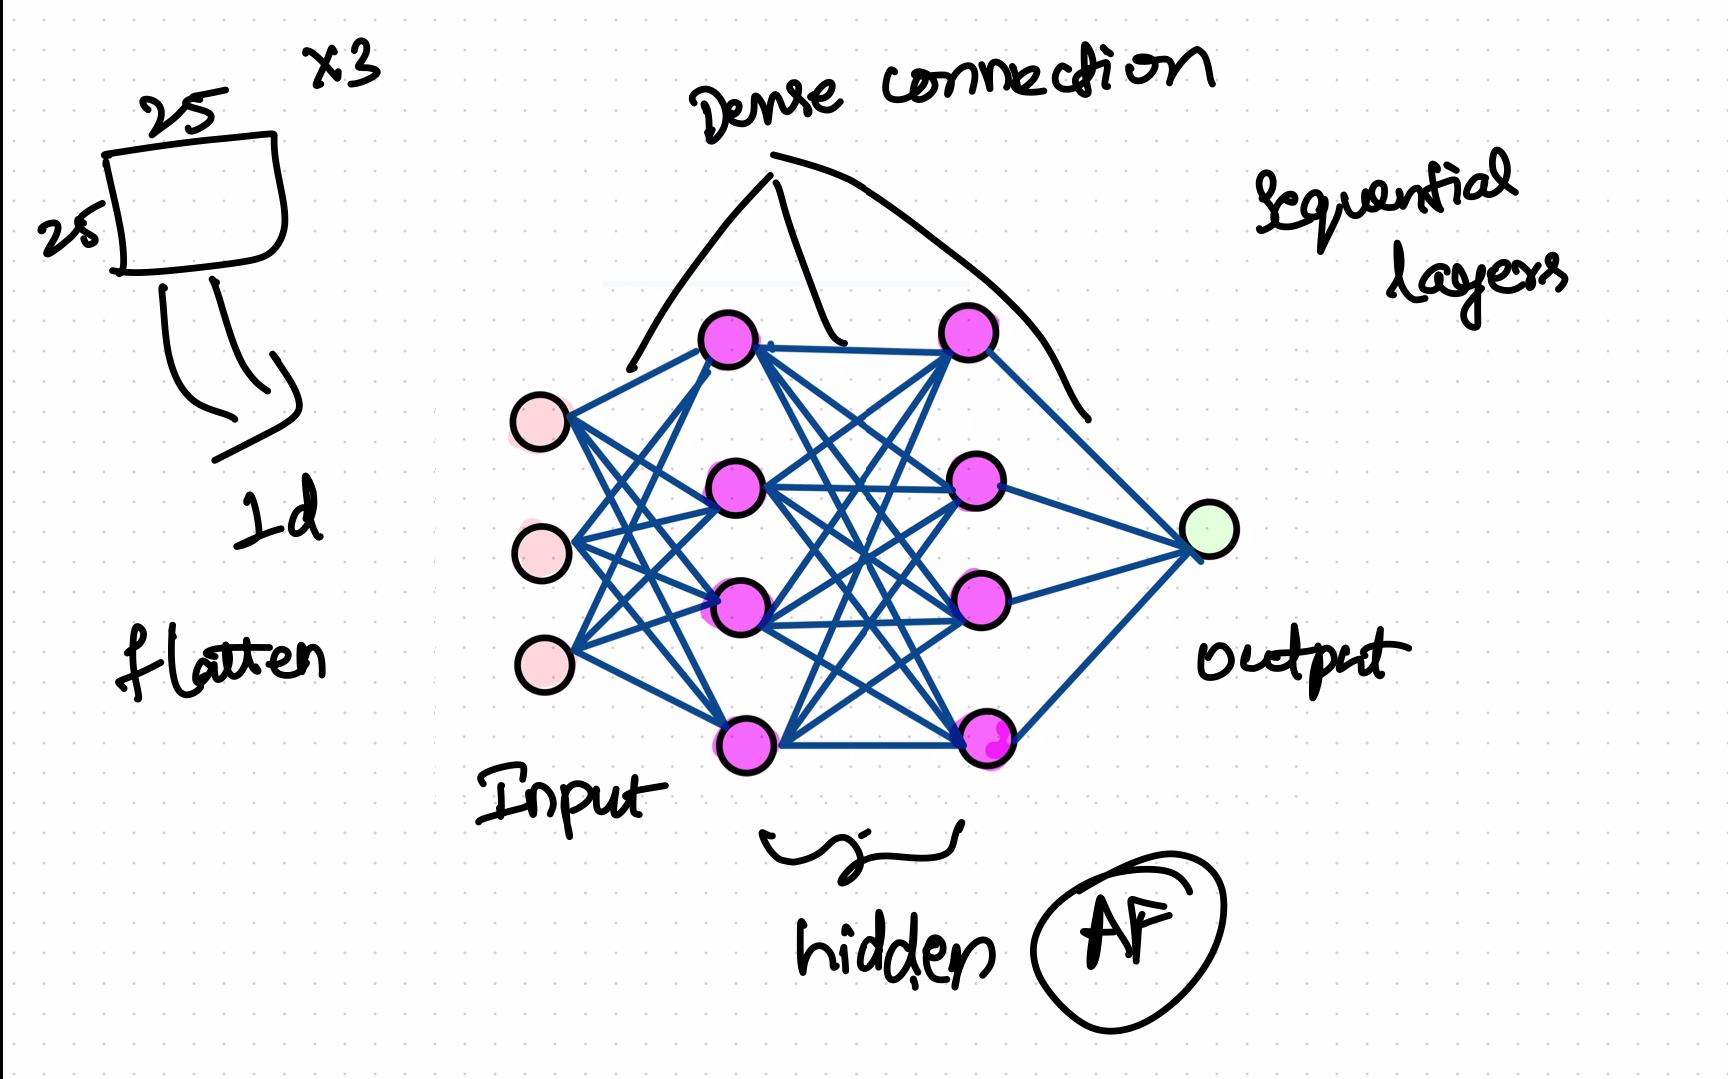

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[25,25,3]))
model.add(tf.keras.layers.Dense(4,activation="relu",name="hidden_1"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1875)              0         
                                                                 
 hidden_1 (Dense)            (None, 4)                 7504      
                                                                 
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 7,529
Trainable params: 7,529
Non-trainable params: 0
_________________________________________________________________


## How to Access Individual Layers in Tensorflow Model

In [ ]:
type(model.layers)

list

In [ ]:
model.layers

In [ ]:
h1 = model.layers[1]

In [ ]:
h1.name

'hidden_1'

In [ ]:
model.get_layer("hidden_1")

In [ ]:
model.get_layer("hidden_1") is h1

True

In [ ]:
h1.get_weights()

[array([[ 0.03898689, -0.03968056, -0.03377338, -0.02320876],
        [-0.04265393,  0.01875691,  0.00542415, -0.04080568],
        [-0.05415582,  0.04337412, -0.00264593,  0.00674754],
        ...,
        [ 0.03905633, -0.01020866, -0.03871555,  0.05640798],
        [ 0.04168858,  0.00330171, -0.01056094,  0.03419706],
        [ 0.04335702,  0.03279441, -0.01366746,  0.01607582]],
       dtype=float32), array([0., 0., 0., 0.], dtype=float32)]

In [ ]:
w , b = h1.get_weights()

In [ ]:
w.shape,b.shape

((1875, 4), (4,))

In [ ]:
x = tf.random.normal([1875])
x

<tf.Tensor: shape=(1875,), dtype=float32, numpy=
array([ 0.2741163 , -1.1606938 ,  2.2448616 , ...,  0.34590507,
       -1.2883112 ,  0.06300354], dtype=float32)>

In [ ]:
tf.expand_dims(x,axis=0).shape

TensorShape([1, 1875])

In [ ]:
h1(tf.expand_dims(x,axis=0))

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.        , 0.        , 1.3582988 , 0.16207649]], dtype=float32)>

## Ways to create Neural Networks with Tensorflow

In [ ]:
# Defining in the format of objects and then adding
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[25,25,3]))
model.add(tf.keras.layers.Dense(4,activation="relu",name="hidden_1"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1875)              0         
                                                                 
 hidden_1 (Dense)            (None, 4)                 7504      
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 7,529
Trainable params: 7,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Defining the layers inside a Sequential object inside python list
model = tf.keras.models.Sequential(layers = [tf.keras.layers.Flatten(input_shape=[25,25,3]),
                                             tf.keras.layers.Dense(4,activation="relu",name="hidden_1"),
                                             tf.keras.layers.Dense(4,activation="relu"),
                                             tf.keras.layers.Dense(1,activation="sigmoid")])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1875)              0         
                                                                 
 hidden_1 (Dense)            (None, 4)                 7504      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 7,529
Trainable params: 7,529
Non-trainable params: 0
_________________________________________________________________


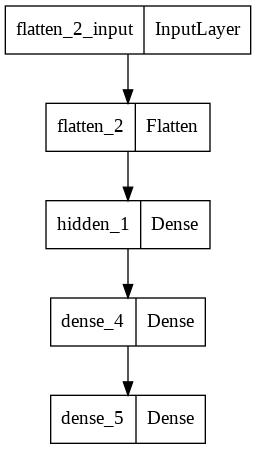

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#Create Model as Functional API
input_1 = tf.keras.layers.Input(shape=[6],name="Input_1")
input_2 = tf.keras.layers.Input(shape=[5],name="Input_2")
h1 = tf.keras.layers.Dense(30, activation="relu",name = "h1")(input_1)
h2 = tf.keras.layers.Dense(30, activation="relu",name = "h2")(h1)
concat = tf.keras.layers.concatenate([input_2,h2],name="concat")
output = tf.keras.layers.Dense(1,activation="sigmoid",name="output")(concat)

model = tf.keras.Model(inputs=[input_1,input_2],
                       outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 h1 (Dense)                     (None, 30)           210         ['Input_1[0][0]']                
                                                                                                  
 Input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 h2 (Dense)                     (None, 30)           930         ['h1[0][0]']                     
                                                                                              

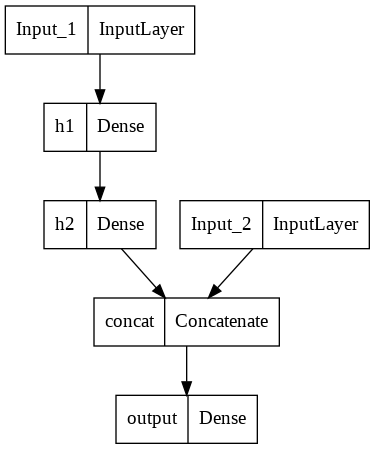

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
from tensorflow import keras

In [ ]:
# Sub classing API
class MyDeepModel(keras.models.Model):
    def __init__(self, units=10, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.sub_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_A)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_B, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = MyDeepModel(30, activation="relu")

In [ ]:
type(model)

keras.engine.functional.Functional

In [ ]:
model.summary()

ValueError: ignored

# Callbacks

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)  = mnist_fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_valid,X_train = X_train_full[:10000],X_train_full[10000:]
y_valid,y_train = y_train_full[:10000],y_train_full[10000:]

In [ ]:
X_valid = X_valid/255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("My_trained_model.h5",
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)

In [ ]:
28*28

784

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30,activation="relu"),
                                    tf.keras.layers.Dense(30,activation="relu"),
                                    tf.keras.layers.Dense(10,activation="softmax")])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5929 - accuracy: 0.7976 - val_loss: 0.4724 - val_accuracy: 0.8308

Epoch 00001: val_loss improved from inf to 0.47242, saving model to My_trained_model.h5
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4244 - accuracy: 0.8505 - val_loss: 0.4229 - val_accuracy: 0.8485

Epoch 00002: val_loss improved from 0.47242 to 0.42288, saving model to My_trained_model.h5
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.8614 - val_loss: 0.4297 - val_accuracy: 0.8478

Epoch 00003: val_loss did not improve from 0.42288
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3684 - accuracy: 0.8696 - val_loss: 0.4102 - val_accuracy: 0.8473

Epoch 00004: val_loss improved from 0.42288 to 0.41020, saving model to My_trained_model.h5
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3520 - accuracy: 0.

## Tensorflow Keras Wrappers - scikit_learn

In [ ]:
#Imports
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=6)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
#Getting one more callback

early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("My_trained_model.h5",
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[model_checkpoint,early_stopping])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4987 - val_loss: 0.8586

Epoch 00001: val_loss improved from inf to 0.85857, saving model to My_trained_model.h5
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7288 - val_loss: 0.5950

Epoch 00002: val_loss improved from 0.85857 to 0.59498, saving model to My_trained_model.h5
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5789 - val_loss: 0.5454

Epoch 00003: val_loss improved from 0.59498 to 0.54537, saving model to My_trained_model.h5
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5373 - val_loss: 0.5160

Epoch 00004: val_loss improved from 0.54537 to 0.51596, saving model to My_trained_model.h5
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5125 - val_loss: 0.4953

Epoch 00005: val_loss improved from 0.51596 to 0.49526, saving model to My_trained_model.h5
Epoch 6/100
363/363 [=============

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3700


In [ ]:
y_pred = keras_reg.predict(X_test)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=52, n_hidden=1, learning_rate=0.01558266538735044 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 3ms/step - loss: 4.5278 - val_loss: 0.4479
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4192 - val_loss: 0.4336
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3933 - val_loss: 0.3856
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3657
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3751 - val_loss: 0.3716
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3726 - val_loss: 0.3595
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3640 - val_loss: 0.3519
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3603 - val_loss: 0.3520
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3566 - val_loss: 0.3501
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3567 - val_loss: 0.3461
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.7s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 0.9889 - val_loss: 0.5574
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6038 - val_loss: 0.4925
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4894 - val_loss: 0.4923
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4583 - val_loss: 0.4706
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4524 - val_loss: 0.4398
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4420 - val_loss: 0.4279
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4360 - val_loss: 0.4123
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4256 - val_loss: 0.4090
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.3990
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4126 - val_loss: 0.3978
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 28.8min finished


363/363 [==============================] - 1s 2ms/step - loss: 0.7969 - val_loss: 0.5296
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - val_loss: 0.4471
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4395 - val_loss: 0.4203
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4205 - val_loss: 0.4017
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4032 - val_loss: 0.3866
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - val_loss: 0.3814
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - val_loss: 0.3645
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3721 - val_loss: 0.3581
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3648 - val_loss: 0.3542
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3645 - val_loss: 0.3481
E

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb97878b750>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001636001990945985,
                                                          0.0027889663584706615,
                                                          0.0008085704350129173,
                                                          0.0007188550168072245,
                                                          0.012884523004235583,
                                                          0.0019429405446499026,
                                                          0.0012441735603119957,
                                                          0.00...
                                                          0.000492759852082983,
                                                          0.02920672561898802,
       

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.007166441913460468, 'n_hidden': 3, 'n_neurons': 70}

In [ ]:
rnd_search_cv.best_score_

-0.3234078387419383

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

## Intializers of Deep Neural Networks